<a href="https://colab.research.google.com/github/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/01_introduction_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST handwritten digits classification with MLPs, by hand

## Goal of notebook:

In this notebook, we'll train a multi-layer perceptron model (a basic kind of neural network) to classify handwritten digits. We'll build up the code by hand. Next week, we show how this can be done using existing Python libraries.

## Machine learning task:

This tutorial works through a supervised learning problem, specifically classification.

Imagine you are making a machine for the post office that will automatically sort mail by zip code. The MNIST dataset contains thousands of examples of handwritten numbers, with each digit labeled 0-9. We will use deep learning to create a function that classifies each image of one number as a digit 0-9.
<img src="https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/mnist_task.png?raw=1"  align="left"/>

First, the needed imports.

In [49]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

import pandas as pd
# Set pandas display option to show all columns without truncation
pd.set_option("display.max_columns", None)

## MNIST data set

Next we'll load the MNIST handwritten digits data set. The first time we may have to download the data, which can take a while.

<img src="https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/MnistExamples.png?raw=1"  align="left"/>

MNIST is a popular dataset, so we can download it via the TensorFlow library. Note:
- x is for the inputs (images of handwritten digits) and y is for the labels or outputs (digits 0-9)
- We are given "training" and "test" datasets. Training datasets are used to fit the model. Test datasets are saved until the end, when we are satisfied with our model, to estimate how well our model generalizes to new data.

In [95]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# this prints what is in a single entry of the raw dataset:

print('1st y_value:', y_test[0])
pd.DataFrame(x_test[0])

1st y_value: 7


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0
9,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0


#We do some pre-processing on the images: convert from integer to float32 and normalize the pixels to be real numbers within 0 to 1

## Why Convert to Float32?

In machine learning and deep learning, it's common to work with data in `float32` format because it is more memory-efficient compared to the default `float64`. The smaller size of `float32` allows for faster computation and reduced memory usage, which can be significant when dealing with large datasets or when training deep neural networks.

This type conversion is often done before feeding the data into a machine learning model, especially if the model expects input in `float32`. It is important to ensure consistency in data types to avoid unexpected issues during model training or inference.


In [51]:
# Convert the data type of elements to float32
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

# Normalize the pixel values by dividing each element by 255
x_train /= 255.
x_test  /= 255.

print(x_train.shape)

(60000, 28, 28)


The training data (x_train) is a tensor of 60,000 images, each of size 28x28 pixels.

For this notebook, we flatten each image to a vector, so x_train is a matrix of size (60000, 28*28).

## Purpose of Flattening Image Data

This reshapes the input data by converting a multi-dimensional array or structure into a one-dimensional array. The reasons for doing this depend on the requirements of the machine learning model being used. Here are some common motivations:

1. **Input Format for Neural Networks:**
   - Many neural network architectures, especially those with fully connected layers, expect the input in a flattened or vectorized format. Each image, typically represented as a 2D or 3D array, needs to be transformed into a 1D vector.

2. **Simplifying Input for Traditional Machine Learning Models:**
   - Some traditional machine learning algorithms, like Support Vector Machines or Decision Trees, may require a 1D representation of the input data.

3. **Consistent Input Shape:**
   - Flattening ensures that each input sample has a consistent shape. This is crucial when training machine learning models, as they often require inputs to be of the same size.
---
- `x_train.shape[0]` represents the number of samples in the training set.
- `numpy.prod(x_train[0,:,:].shape)` calculates the product of the dimensions of the first image in the training set. This operation effectively flattens each image into a 1D array.

This process is part of the data preprocessing step and is commonly used in machine learning, especially when working with image data. The goal is to ensure a consistent and compatible input format for machine learning models, particularly those that expect flattened or vectorized representations of input images.

In [52]:
x_train = x_train.reshape(x_train.shape[0], numpy.prod(x_train[0,:,:].shape))
x_test = x_test.reshape(x_test.shape[0], numpy.prod(x_test[0,:,:].shape))

print(x_train.shape)

(60000, 784)


y_train is a 60000-dimensional vector containing the correct classes ("0", "1", ..., "9") for each training sample.

In [53]:
y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 784)
y_train: (60000,)


Let's take a closer look. Here are the first 10 training digits:

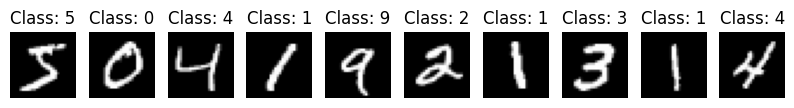

In [54]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

## Linear model

## Introduction to Simple Linear Model with Flattened Images

Let's start with a basic linear model, similar to linear regression discussed last week. However, we introduce a slight complication: each example in our dataset is now represented as a vector, specifically a flattened image. This modification affects the way we calculate the "slope" in our linear model; instead of a simple multiplication, it becomes a dot product.

### Linear Regression with Flattened Images

In the context of machine learning, especially in image-related tasks, each example is often a vectorized form of an image, commonly referred to as a flattened image. This means that the pixel values of the image are arranged in a one-dimensional vector.

### Dot Product in Linear Model

The multiplication operation in the linear model is replaced by a dot product when dealing with flattened images. Each example (flattened image) is now represented as a vector, and the linear transformation involves computing the dot product of this vector with the weight parameters.

### Handling Multiple Examples

Similar to our previous discussions, we continue to consider multiple examples simultaneously. The variable `input_images` is a matrix where each row represents a different example. This matrix organization allows us to efficiently process and represent a batch of examples, making the linear model applicable to real-world datasets with diverse samples.

In summary, the linear model with flattened images involves representing each example as a vector and performing dot products to calculate the linear transformation. This approach is particularly relevant when dealing with image data in machine learning tasks.

In [55]:
def linear_model(W, input_images):
    # W: Weight matrix representing the model parameters.
    #input_images: Matrix containing input examples, where each row represents an example.

    # The function returns the result of the dot product between input_images and W.

    # f(x) = xW returns m-length vector, where m is the number of examples
    return numpy.dot(input_images, W)

Like last week, the loss is mean squared error (MSE):

$\large{MSE = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y})^{2}}$

There are many others, but MSE which is a commonly used metric to quantify the average squared difference between the actual values (denoted by $(y)$) and the predicted values (denoted by $(\hat{y})$ in a dataset.

##Here's a breakdown of the components in the expression:

- $(n)$ is the number of examples or data points in the dataset.
- $(i)$ is an index representing each individual example in the dataset.
- $(y_i)$ is the actual or observed value for the $i$-th example.
- $(\hat{y}_i)$ is the predicted value for the $i$-th example.

##The MSE is calculated as follows:

1. For each example $(i)$, calculate the squared difference between the actual $(y_i)$ and predicted $(\hat{y}_i)$ values using the formula: $(y_i - \hat{y}_i)^2)$.
2. Sum up these squared differences across all examples by applying the summation notation: $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$.
3. To obtain the mean squared error (MSE), average the sum by dividing it by the total number of examples $(n)$: $\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$.

In this format, each step is presented in a numbered list for clarity and easy reference. The LaTeX equations are preserved to maintain the mathematical expressions.


The resulting value is the mean squared error, which provides a measure of how well the predictions align with the actual values in the dataset. Lower MSE values indicate better alignment between predictions and actual outcomes.

In summary, the MSE is a key metric used in regression problems to evaluate the accuracy of predictions by penalizing larger errors more heavily. The goal is to minimize the MSE during the training of a model.

In [56]:
def evaluate(W, input_images, true_labels):
    predicted_label = linear_model(W, input_images)
    MSE = numpy.mean((true_labels - predicted_label)**2)
    return MSE

Update weights using gradient decent
$\large{W = W - \eta \frac{\partial J(W)}{\partial W} }$,  where, $W$ is the network weight, $\eta$ is the learning rate and $J(W)$ is the objective function

In [57]:
def learn(input_images, true_labels, current_W, learning_rate=0.000001):
    # First, calculate the partial derivatives of the mean squared error (JW = MSE).
    n = input_images.shape[0]  # Get the number of examples to average over.
    label_predictions = linear_model(current_W, input_images)

    # Calculate the gradient: one entry per partial derivative for an entry in vector W.
    dJW_dW = (2. / n) * numpy.dot(input_images.transpose(), label_predictions - true_labels)

    # Update W using the gradient descent step.
    new_W = current_W - (learning_rate * dJW_dW)

    return new_W

In practice, we usually don't use all of the training data to calculate each step. We use a random subset. This makes the steps faster and noisier.

Introducing noise by using random subsets during optimization enhances the efficiency, robustness, and generalization ability of machine learning models.

- The random selection of a subset introduces stochasticity into the optimization process. This stochastic nature helps the optimization algorithm escape local minima and explore a larger portion of the parameter space. It prevents the model from getting stuck in a suboptimal solution and promotes convergence to a better overall solution.

- It also enables the use of parallel computing resources and helps avoid overfitting.

Overfitting occurs when a machine learning model learns the training data too well, capturing noise and specific details that are not representative of the broader underlying patterns. As a result, the model performs exceptionally on the training data but fails to generalize effectively to new, unseen data. Overfit models are excessively complex and may memorize the training set instead of learning the underlying relationships, leading to poor performance on real-world tasks. Regularization techniques and validation datasets are commonly used to address and mitigate overfitting.



In [58]:
# At the moment we take the simple route and use a fixed subset.
batch_size = 100

x_train_batch = x_train[:batch_size, :]
y_train_batch = y_train[:batch_size,numpy.newaxis]

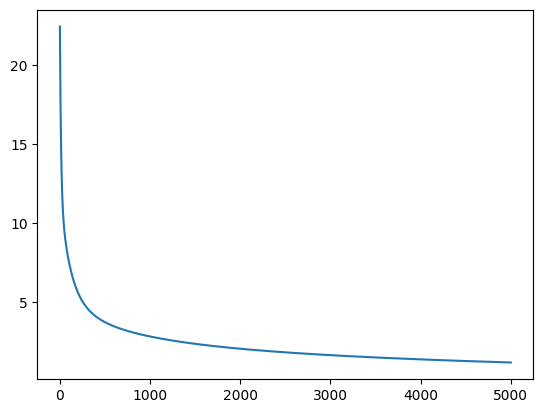

In [59]:
# Determine the number of features, which corresponds to the number of pixels
num_features = x_train.shape[1] # this is the number of pixels

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# Iterate num_iters times, with the step size defined by learning_rate
learning_rate = 0.0005
num_iters = 5000
losses = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # here is the magic

    # Update W using the learn function
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    # Evaluate the current loss and store it in the losses array
    losses[i] = evaluate(W, x_train_batch, y_train_batch)
plt.plot(losses)

### Check results so far

As expected, this simple linear model f(x) = xW is not very accurate

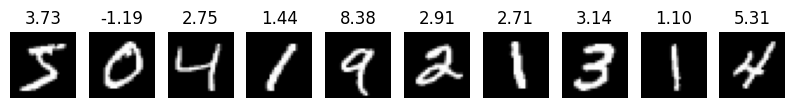

In [60]:
pltsize = 1  # Set the size of the plots
plt.figure(figsize=(10 * pltsize, pltsize))  # Create a figure with specified size

# Predict labels for the first 10 examples using the linear model
predicted_labels = linear_model(W, x_train[:10, :])

# Loop through the first 10 examples
for i in range(10):
    plt.subplot(1, 10, i + 1)  # Create a subplot for each example
    plt.axis('off')  # Turn off axis labels

    # Display the original image by reshaping it to 28x28 pixels and using a grayscale colormap
    plt.imshow(numpy.reshape(x_train[i, :], (28, 28)), cmap="gray")

    # Set the title of each subplot as the predicted label for that example
    plt.title('%1.2f' % predicted_labels[i])


## In-class exercise: implement "accuracy" - number of images correctly labeled

In [76]:

# one answer, following the format of the above evaluate function:

def accuracy(true_labels, predicted_labels):
    N = predicted_labels.shape[0]
    acc = (true_labels == predicted_labels).sum() / N
    return acc

def evaluate_accuracy(W, input_images, true_labels):
    predicted_labels = numpy.round(linear_model(W, input_images)) # round real numbers to integer labels
    acc = accuracy(true_labels, predicted_labels)
    return acc

In [77]:
# can plot this definition of accuracy here to check that it looks reasonable

# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
losses = numpy.zeros(num_iters,)
accuracies = numpy.zeros(num_iters,)

for i in range(0, num_iters):
    # all the magic here
    W = learn(x_train_batch, y_train_batch, W, learning_rate)
    losses[i] = evaluate(W, x_train_batch, y_train_batch)
    accuracies[i] = evaluate_accuracy(W, x_train_batch, y_train_batch)

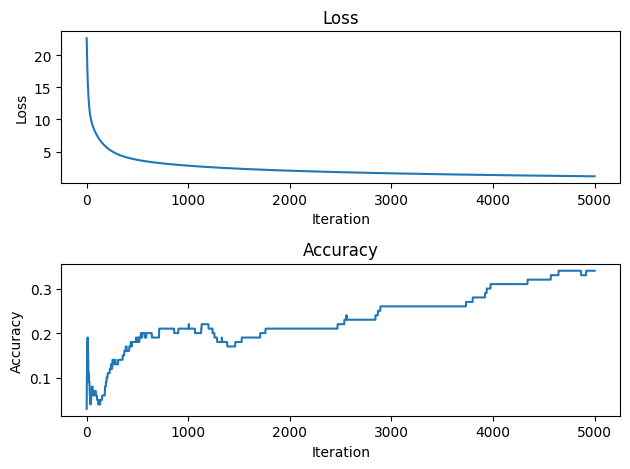

In [80]:
plt.figure()

# Plot for losses
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Plot for accuracies
plt.subplot(2, 1, 2)
plt.plot(accuracies)
plt.title('Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


### Improving the model

Examples of basic ways to improve:
- Add bias term: f(x) = xW + b (In neural networks, the bias term is often associated with each neuron, contributing to the neuron's ability to activate even when the weighted sum of inputs is zero.) The bias term allows the model to account for a baseline prediction and improves its ability to capture patterns in the data, especially when the input features are not always zero.
- Reformulate as classification (output integers, not real numbers), like logistic regression
- Minimize something other than mean squared error

The sigmoid function encourages outputs of 0 and 1

---
### Sigmoid Function (`sigmoid`):

- The `sigmoid` function implements the sigmoid activation function, commonly used in binary classification problems.
- It transforms any real-valued number into the range (0, 1), making it suitable for binary classification where the output can be interpreted as probabilities.
- The formula for the sigmoid function is \( \sigma(x) = \frac{1}{1 + e^{-x}} \), where \( e \) is the base of the natural logarithm.

### Classification Model (`classification_model`):

- The `classification_model` function defines a classification model using a sigmoid activation function.
- It takes three parameters:
  - `A`: Weight matrix representing the model parameters.
  - `b`: Bias term.
  - `input_images`: Matrix containing input examples, where each row represents an example.
- The function computes the dot product of the input images (`numpy.dot(input_images, A)`) and adds the bias term `b`. The result is then passed through the sigmoid activation function using the previously defined `sigmoid` function.
- The output is a vector of probabilities, each corresponding to the likelihood of a binary classification (e.g., class 0 or class 1) for each input example.

In summary, the provided code defines a sigmoid activation function and a classification model that utilizes the sigmoid function for binary classification tasks.



In [61]:
def sigmoid(x):
    z = 1/(1 + numpy.exp(-x))
    return(z)

def classification_model(A, b, input_images):
    # f(x) = sigmoid(xA + b) returns m-length vector, where m is the number of examples
    return sigmoid(numpy.dot(input_images, W) + b)

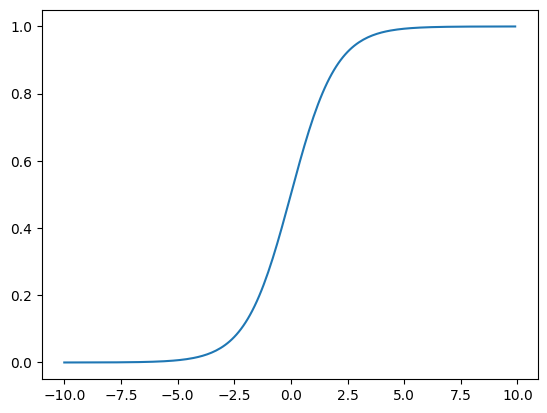

In [62]:
x = numpy.arange(-10, 10, step=.1)
plt.plot(x, sigmoid(x))

To handle multiple classes, it's common to use a one-hot encoding:

#### Example: Categorical Variable "Color"

### Integer Mapping:

- Red: 1
- Green: 2
- Blue: 3

### One-Hot Encoding:

- Red: [1, 0, 0]
- Green: [0, 1, 0]
- Blue: [0, 0, 1]

This way, each category is represented as a unique binary vector, and the model can understand and process these vectors as input features.

One-hot encoding is commonly used in scenarios where the categorical variable doesn't have an inherent ordinal relationship (i.e., the order does not matter), and each category is independent of the others. It is widely used in machine learning tasks such as classification, where models require numerical input.


In [63]:
# one-hot encoding,
nb_classes = 10
y_train_onehot = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, nb_classes)

# 1 for each number :
# the number one would be ?
# [ ?,?,?,?.....]

Training sample 0 : class: 5 , one-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Training sample 1 : class: 0 , one-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 2 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Training sample 3 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 4 : class: 9 , one-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Training sample 5 : class: 2 , one-hot encoded: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Training sample 6 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 7 : class: 3 , one-hot encoded: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Training sample 8 : class: 1 , one-hot encoded: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Training sample 9 : class: 4 , one-hot encoded: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


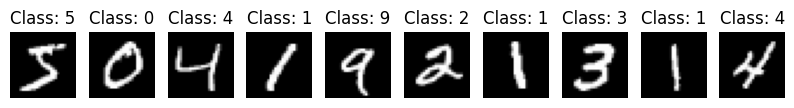

In [64]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(numpy.reshape(x_train[i,:], (28, 28)), cmap="gray")
    plt.title('Class: '+str(y_train[i]))
    print('Training sample',i,': class:',y_train[i], ', one-hot encoded:', y_train_onehot[i])

To handle multi-class classification, it's common to use softmax instead of sigmoid. It's related but forces the outputs to sum to 1, like a probability distribution. The class with the highest value is the prediction.
---
The `softmax` function is a crucial component in the final layer of neural networks for multi-class classification, providing a way to interpret raw scores as class probabilities. This function is a mathematical operation commonly used in machine learning for multi-class classification problems. It takes an input vector \(x\) and transforms it into a probability distribution over multiple classes.

- **Input:**
  - `x`: A matrix where each row corresponds to the unnormalized scores (logits) for different classes.

- **Output:**
  - `z`: A matrix representing the probabilities for each class after applying the softmax operation.

- **Softmax Operation:**
  1. The `numpy.exp(x)` calculates the exponential of each element in the input matrix, which essentially transforms the logits into positive values.
  2. `numpy.sum(numpy.exp(x), axis=1)` computes the sum of exponentials along each row, obtaining the normalization factor for each example.
  3. `normalization[:, None]` ensures proper broadcasting, converting the normalization factor into a column vector.
  4. The division `numpy.exp(x) / normalization[:, None]` normalizes the exponentials by dividing each element by its corresponding normalization factor. This step results in a probability distribution for each example.
  5. The final output `z` is a matrix where each row represents the probability distribution over classes for a specific example.

- **Interpretation:**
  - The softmax function transforms the raw scores (logits) into probabilities, making it suitable for multi-class classification tasks.
  - The output values in each row of `z` represent the probabilities assigned to different classes, ensuring that the probabilities sum to 1 for each example.



In [65]:
def softmax(x):
    normalization = numpy.sum(numpy.exp(x),axis=1)
    z = numpy.exp(x) / normalization[:,None]
    return(z)

In [66]:
# Randomly initialize W and b
W = .01 * numpy.random.rand(num_features,10)
b = .01 * numpy.random.rand(10,)

def classification_model(W, b, input_images):
    # f(x) = softmax(xW + b) returns m x 10 matrix, where m is the number of examples and 10 is the number of classes
    return softmax(numpy.dot(input_images, W) + b)

In [67]:
# To demonstrate softmax, we can apply this model with random W & b
predicted_labels = classification_model(W, b, x_train[:5,:])

In [68]:
# Here the class "probabilities" might all be very similar since the model hasn't been trained
print(predicted_labels[0,:])
print(sum(predicted_labels[0,:]))

[0.10011422 0.09576759 0.10614554 0.10130298 0.09938426 0.09753557
 0.10180406 0.10231732 0.09691615 0.09871232]
1.0000000000000002


Also, for multi-class classification problem, it is common to minimize a different "loss" function instead of mean squared error, like categorical cross-entropy. You can read more [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/).

## Nonlinear Model

The above improvements are not enough to classify these images. We move to a nonlinear model.

A neural network has multiple layers. A basic layer is $\sigma(xA + b)$, where $\sigma$ is a nonlinear "activation function."

Introducing multiple layers in a neural network allows it to learn hierarchical representations, and the addition of each layer involves an affine transformation followed by a non-linear activation function. This architecture enables neural networks to model intricate relationships and patterns in data, making them effective for a wide range of tasks, including classification, regression, and feature learning.
---

The expression represents a basic layer in a neural network, where:

- \( x \) is the input vector,
- \( A \) is the weight matrix,
- \( b \) is the bias vector,
- \( $\sigma$) is a non-linear activation function applied element-wise.

This basic layer is often referred to as a single hidden layer in neural network terminology. However, neural networks typically consist of multiple layers to capture complex relationships in data. Adding more layers enables the network to learn hierarchical features and representations.

The statement "An example neural network with two layers adds another affine transformation" implies the introduction of an additional layer to the network. A neural network with two layers is often called a two-layer neural network, which includes:

1. The first layer: $\( \sigma(xA + b) \)$
   - This represents the initial layer with the non-linear activation function applied to the weighted sum of inputs.

2. The second layer: $\( \sigma(zC + d) \)$
   - Here, \( z \) is the output from the first layer, \( C \) is another weight matrix, and \( d \) is a bias vector.
   - This constitutes an additional affine transformation followed by the same non-linear activation function.

By stacking multiple layers, the neural network becomes capable of learning more complex and abstract representations from the input data. Each layer captures different aspects of the data, and the non-linear activation functions introduce non-linearities, enabling the network to approximate complex functions and make it more expressive.


---
An example neural network with two layers adds another affine transformation:

$f(x) = \sigma(\sigma(xW_1 + b_1)W_2 + b_2)$

This is often drawn as a network like this:


<img src="https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/tiny_network.png?raw=1" width="300" hight="300" align="left"/>

##Writing it in numpy, with sigmoid as the activation function

---

An activation function in the context of neural networks is a mathematical operation applied to each node (or neuron) in a neural network. It introduces non-linearity to the network, allowing it to model complex relationships and learn intricate patterns in the data. The activation function decides whether a neuron should be activated (output a non-zero value) or not (output zero), based on its input.

Commonly used activation functions include:

1. **Sigmoid Function $(\( \sigma \))$:**
   $\[ \sigma(x) = \frac{1}{1 + e^{-x}} \]$
   - Outputs values between 0 and 1.
   - Used in the output layer of binary classification models.

2. **Hyperbolic Tangent Function (tanh):**
   $\[ \tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1} \]$
   - Outputs values between -1 and 1.
   - Similar to the sigmoid but with a range from -1 to 1.

3. **Rectified Linear Unit (ReLU):**
   $\[ \text{ReLU}(x) = \max(0, x) \]$
   - Outputs the input for positive values, zero for negative values.
   - Popular for hidden layers due to simplicity and efficiency in training.

4. **Leaky Rectified Linear Unit (Leaky ReLU):**
   \[ \text{Leaky ReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ 0.01x, & \text{otherwise} \end{cases} \]
   - Similar to ReLU but allows a small gradient for negative values to address the "dying ReLU" problem.

5. **Softmax Function:**
   \[ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} \]
   - Used in the output layer of multi-class classification models.
   - Converts input values into a probability distribution.

The role of an activation function is crucial in enabling a neural network to learn complex representations and relationships in the data. The non-linearity introduced by these functions allows the network to approximate and generalize well to diverse patterns and structures. Choosing an appropriate activation function depends on the specific task and characteristics of the data being modeled.

In [69]:
def nonlinear_model(W1, W2, b1, b2, input_images):
    return sigmoid(numpy.dot(sigmoid(numpy.dot(input_images, W1) + b1), W2) + b2)

Adding another layer:

$f(x) = \sigma(\sigma(\sigma(xW_1 + b_1)W_2 + b_2)W_3 + b_3)$


<img src="https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/three_layer_network.png?raw=1" width="300" hight="300" align="left"/>

In [70]:
def nonlinear_model(A1, A2, A3, b1, b2, b3, input_images):
    return sigmoid(numpy.dot(sigmoid(numpy.dot(sigmoid(numpy.dot(input_images, A1) + b1), A2) + b2), A3) + b3)

We will learn about other activation functions (nonlinearities) next week.

Optimizing a nonlinear model:
- We still want to use stochastic gradient descent (or a variant), but now the gradients are more complicated
- The gradients can be calculated with calculus (chain rule!). To save on computation, we move backward through the layers, saving intermediate results for re-use. This is called **back-propagation**.
- Applying the current network to the data is often called the "forward pass," and calculating the gradients is called the "backward pass."

Nonlinear neural networks can fit more complicated data than linear models. On the other hand, deep learning training can be tricky.

1. Unlike linear regression, the objective function that you're minimizing (some measure of error) is non-convex, so there can be many local optima. As we learned about last week, the learning rate can help you jump into a new area, although too much jumping can be bad.

![multiple local minima](https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/nonconvex.png?raw=1)

Image source: [firsttimeprogrammer.blogspot.com](http://firsttimeprogrammer.blogspot.com/2014/09/multivariable-gradient-descent.html)

There are some fancier versions of gradient descent optimization algorithms that are more effective, such as:
- Adam
- RMSprop
- Adadelta
- Adagrad

For far more information, and some cool animations, see https://ruder.io/optimizing-gradient-descent/ or https://distill.pub/2017/momentum/. It will be easier to try them out next week when we are using TensorFlow.

2. Neural networks can be overly flexible/complicated and "overfit" your data. This is like what happens if you fit a high-degree polynomial:


<img src="https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/bias_vs_variance.png?raw=1" width="800" hight="500" align="left"/>

3. To improve the generalization of our model on previously unseen data, we employ a technique known as regularization, which constrains our optimization problem in order to discourage complex models. Next week, we'll learn about Dropout for regularization. A simpler form is to add a penalty for large weights ("L2 regularization").


<img src="https://github.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_3/images/test_data_rule.png?raw=1" width="800" hight="500" align="left"/>

## In-class exercise: split the training data into training & validation, and track validation loss during the training loop.

Tip: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

How do we know when to stop training? For example, you might stop when the validation loss stops improving.

Now that we have the basics, we can experiment with more complicated networks. Rather than implement these all by hand, we will move to using existing Python packages next week.

There are variants of "universal approximation theorems" roughly stating that there exists a nonlinear neural network with one hidden layer (possibly very wide) can fit an "arbitrary" nice/smooth function arbitrarily well. However, we can make the optimizaiton easier with fancier layers than "fully connected," like convolutional layers, which we will learn about next week.

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)


In [73]:

# for simplicity and speed, we could again consider just a batch of training data & a batch of validation data
x_train_batch2 = x_train2[:batch_size, :]
y_train_batch2 = y_train2[:batch_size,numpy.newaxis]
x_val_batch = x_val[:batch_size, :]
y_val_batch = y_val[:batch_size,numpy.newaxis]

In [81]:
# Randomly initialize W
W = .01 * numpy.random.rand(num_features,1)

# now iterate num_iters times, with the step size defined by learning_rate
losses = numpy.zeros((num_iters,2)) # 1st column for training data, 2nd for validation data
accuracies = numpy.zeros((num_iters,2))

for i in range(0, num_iters):
    W = learn(x_train_batch2, y_train_batch2, W, learning_rate)
    losses[i,0] = evaluate(W, x_train_batch, y_train_batch)
    losses[i,1] = evaluate(W, x_val_batch, y_val_batch)
    accuracies[i,0] = evaluate_accuracy(W, x_train_batch2, y_train_batch2)
    accuracies[i,1] = evaluate_accuracy(W, x_val_batch, y_val_batch)

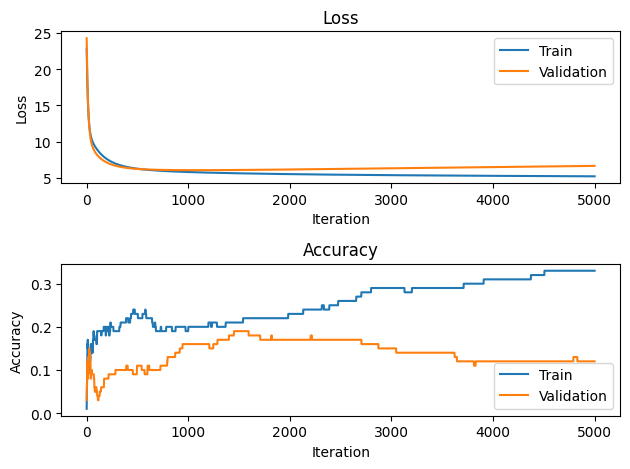

In [84]:
import matplotlib.pyplot as plt

# Assuming 'losses' and 'accuracies' are your data arrays with two columns

plt.figure()

# Plot for losses
plt.subplot(2, 1, 1)
plt.plot(losses[:, 0], label='Train')
plt.plot(losses[:, 1], label='Validation')
plt.legend()
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# Plot for accuracies
plt.subplot(2, 1, 2)
plt.plot(accuracies[:, 0], label='Train')
plt.plot(accuracies[:, 1], label='Validation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


HW is to improve the accuracy of the model to above 0.7 (1.0 is the highest)